In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [128]:
slide = False
slide = True
tmp_str = ""
if slide:
    tmp_str = "row_20/qr_2.0/ops_10"

# Directory containing your epoch files
data_dir = f"/jumbo/yaoqingyang/kinshuk/TempBalance/results/flatten/42/vgg_cifar16/cifar100/slide_{slide}/{tmp_str}/esd_est"

# Collect all epoch files
epoch_files = [f for f in os.listdir(data_dir) if f.startswith("epoch_")]
epoch_files.sort(key=lambda f: int(f.split('_')[1]))

# restrict to first 51 epochs
epoch_files = epoch_files[:50]
# print(epoch_files)

: 

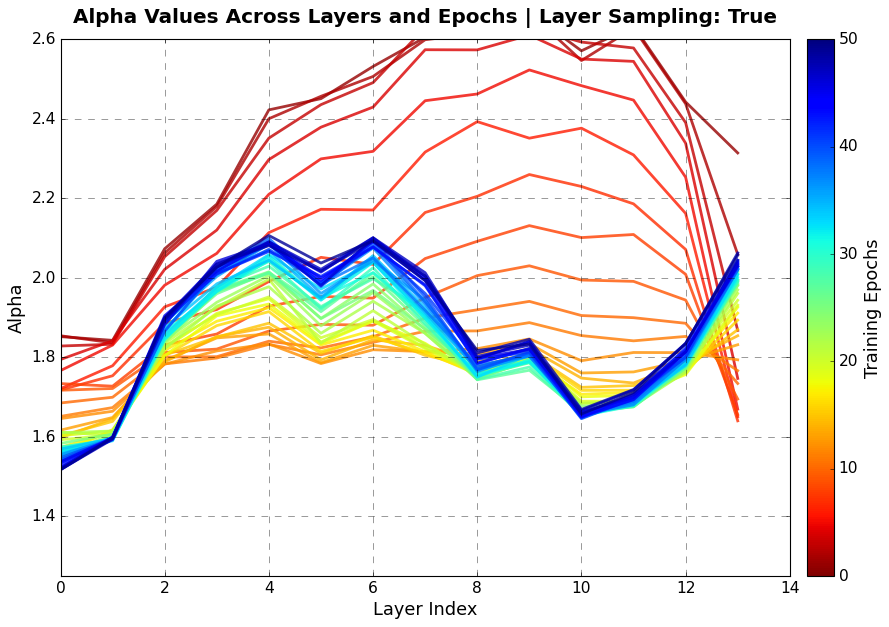

: 

In [129]:
plt.style.use('classic')  # Replace 'classic' with the specific style if known

# Initialize data storage
layer_alpha_data = []

# Process each epoch file
for _, epoch_file in enumerate(epoch_files):
    epoch_path = os.path.join(data_dir, epoch_file)
    epoch_number = int(epoch_file.split('_')[1])  # Extract epoch number from filename
    df = pd.read_csv(epoch_path)
    df['epoch'] = epoch_number
    layer_alpha_data.append(df[['alpha', 'epoch']])  # Keep only 'alpha' and 'epoch'

# Concatenate data from all epochs
all_data = pd.concat(layer_alpha_data, ignore_index=True)

# Add layer index
all_data['layer_index'] = all_data.groupby('epoch').cumcount()

# Set color map based on epochs to match the image style
num_epochs = len(epoch_files)
cmap = plt.get_cmap('jet_r')  # Replace 'jet' with the colormap used in the image
colors = [cmap(i / num_epochs) for i in range(num_epochs)]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('white')  # Set figure background color if needed

# Plot alpha values
for epoch_number, color in enumerate(colors):
    epoch_data = all_data[all_data['epoch'] == epoch_number]
    ax.plot(
        epoch_data['layer_index'],
        epoch_data['alpha'],
        color=color,
        alpha=0.8,       # Adjust transparency if needed
        linewidth=2.5,   # Adjust line width to match the image
        linestyle='-',   # Adjust line style if needed
    )

# Customize grid style to match the image
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Set axis labels and title with matching fonts and sizes
ax.set_title(f"Alpha Values Across Layers and Epochs | Layer Sampling: {slide}",
             fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel("Layer Index", fontsize=16)
ax.set_ylabel("Alpha", fontsize=16)

# Adjust tick parameters to match the image
ax.tick_params(axis='both', which='major', labelsize=14)

norm = Normalize(vmin=0, vmax=num_epochs)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Training Epochs', fontsize=16)

# Adjust colorbar tick labels
cbar.ax.tick_params(labelsize=14)

# Adjust layout
plt.tight_layout()
plt.ylim(1.25, 2.6)

# Display the plot
plt.show()

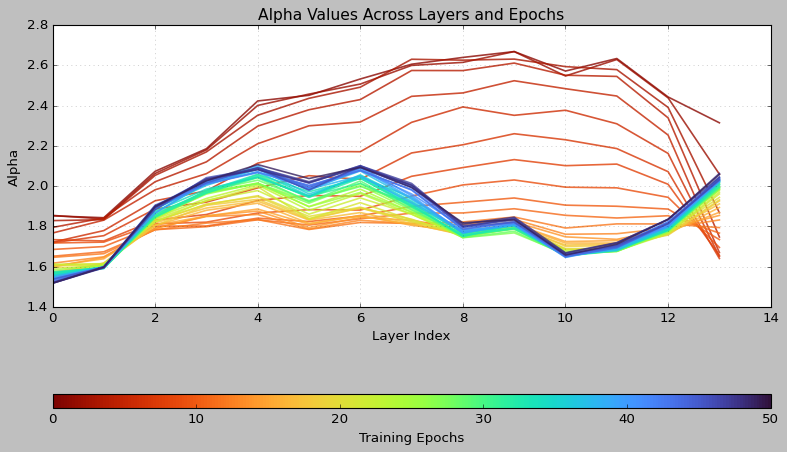

: 

In [130]:
# Initialize data storage
layer_alpha_data = []

# Process each epoch file
for epoch_file in epoch_files:
    epoch_path = os.path.join(data_dir, epoch_file)
    epoch_number = int(epoch_file.split('_')[1])  # Extract epoch number from filename
    df = pd.read_csv(epoch_path)
    df['epoch'] = epoch_number
    layer_alpha_data.append(df[['alpha', 'epoch']])  # Keep only 'alpha' and 'epoch'

# Concatenate data from all epochs
all_data = pd.concat(layer_alpha_data, ignore_index=True)

# Add layer index
all_data['layer_index'] = all_data.groupby('epoch').cumcount()

# Set color map based on epochs
num_epochs = len(epoch_files)
cmap = plt.get_cmap('turbo_r')  # Use 'plasma' for gradient
colors = [cmap(i / num_epochs) for i in range(num_epochs)]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot alpha values
for epoch_number, color in enumerate(colors):
    epoch_data = all_data[all_data['epoch'] == epoch_number]
    ax.plot(
        epoch_data['layer_index'], 
        epoch_data['alpha'], 
        color=color, 
        alpha=0.8, 
        linewidth=1.5
    )

# Add a colorbar
norm = Normalize(vmin=0, vmax=num_epochs)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Explicitly attach the colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.2, aspect=50)
cbar.set_label('Training Epochs')

# Customize plot
ax.set_title("Alpha Values Across Layers and Epochs", fontsize=14)
ax.set_xlabel("Layer Index", fontsize=12)
ax.set_ylabel("Alpha", fontsize=12)
ax.grid(alpha=0.3)
fig.tight_layout()

# Show plot
# plt.show()